In [1]:
import pandas as pd
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
#!pip install seaborn
import seaborn as sns
!pip install missingno
import missingno as msno
!pip install squarify
import squarify

In [2]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')

<Figure size 640x480 with 0 Axes>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/dwaraga/big_startup_secsees_dataset.csv')

In [5]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


# Exploratory Data Analysis

In [7]:
print("dataset shape:",df.shape)
print("dataset info:", df.info())
display("dataset info:", df.describe())
display("dataset info:", df.describe(include=['O']))

dataset shape: (66368, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB
dataset info: None


'dataset info:'

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


'dataset info:'

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
count,66368,66367,61310,63220,66368,66368,59410,57821,58338,58340,51147,66344,66368
unique,66368,66102,61191,27296,18896,4,137,311,1092,5111,3978,4817,4518
top,/organization/-fame,Blink,http://www.askforoffer.com,Software,-,operating,USA,CA,SF Bay Area,San Francisco,2012-01-01,2014-01-01,2014-01-01
freq,1,4,5,3995,12785,53034,37601,12900,8804,3526,2730,565,483


In [8]:
df.duplicated().sum()

0

Handling with missing values
Let's visualize missing values

In [9]:
df.isnull().sum()/df.count()*100

permalink             0.000000
name                  0.001507
homepage_url          8.249878
category_list         4.979437
funding_total_usd     0.000000
status                0.000000
country_code         11.711833
state_code           14.781827
region               13.764613
city                 13.760713
funding_rounds        0.000000
founded_at           29.759321
first_funding_at      0.036175
last_funding_at       0.000000
dtype: float64

<Axes: >

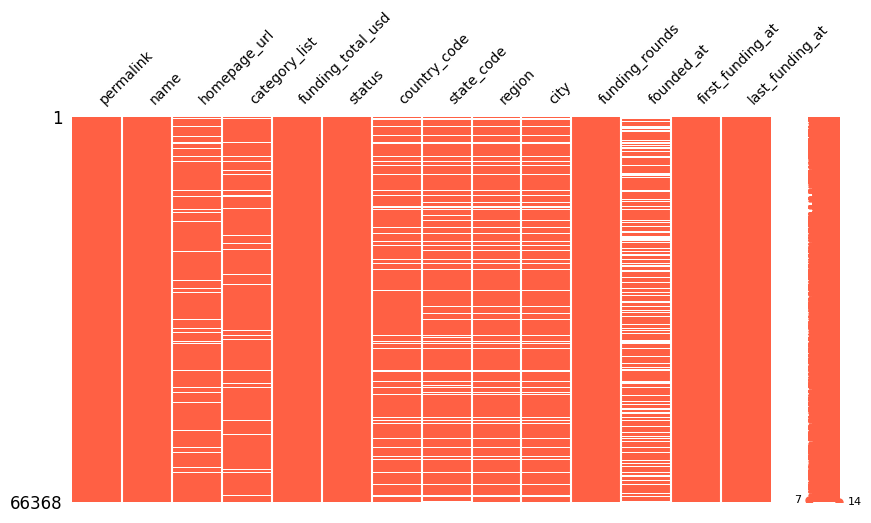

In [10]:
msno.matrix(df,fontsize=10, color=(1, 0.38, 0.27),figsize=(10,5))

<Axes: >

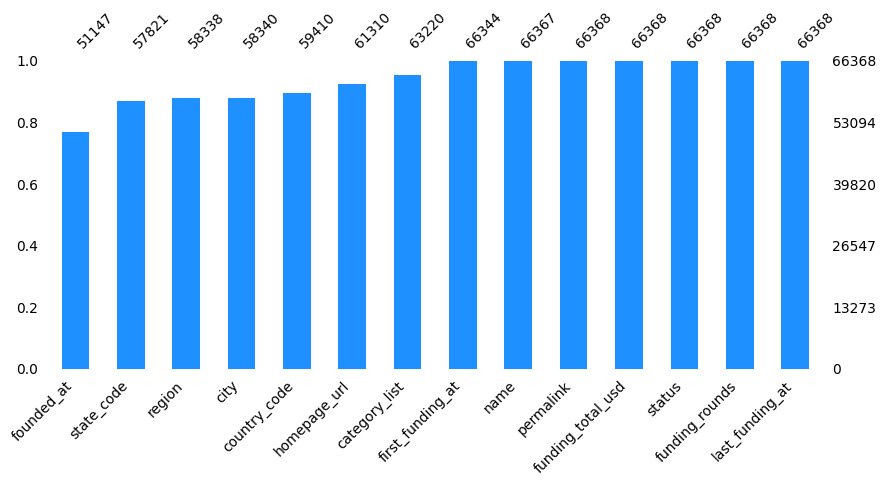

In [11]:
msno.bar(df, figsize=(10,4),color="dodgerblue", sort="ascending",fontsize=10)

<Axes: >

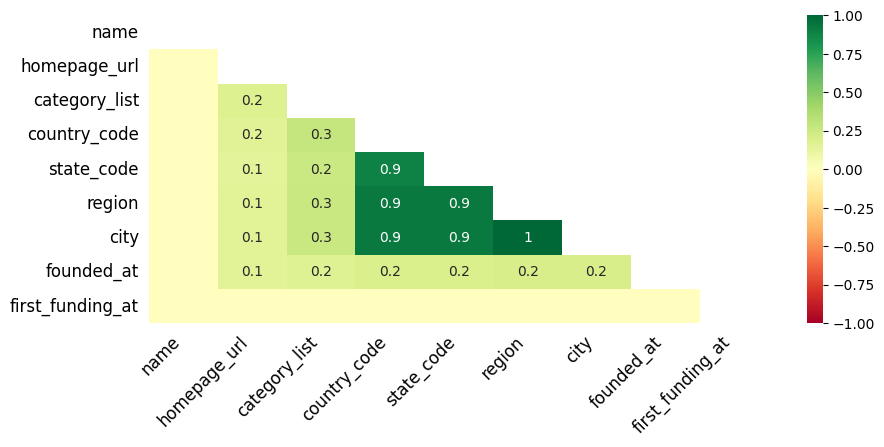

In [12]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df, cmap="RdYlGn", figsize=(10,4), fontsize=12)

<Axes: >

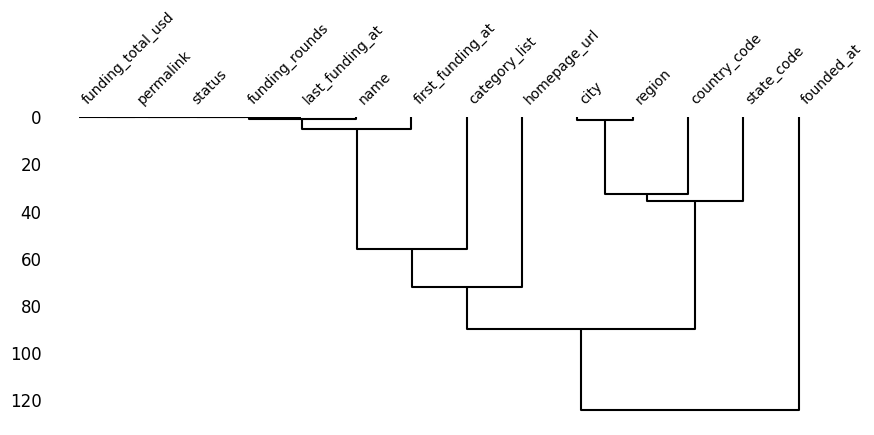

In [13]:
msno.dendrogram(df,figsize=(10,4),fontsize=10)

See if we find a pattern in the missing values, such as a part of the dataset where values are missing for many columns at once.

<Axes: >

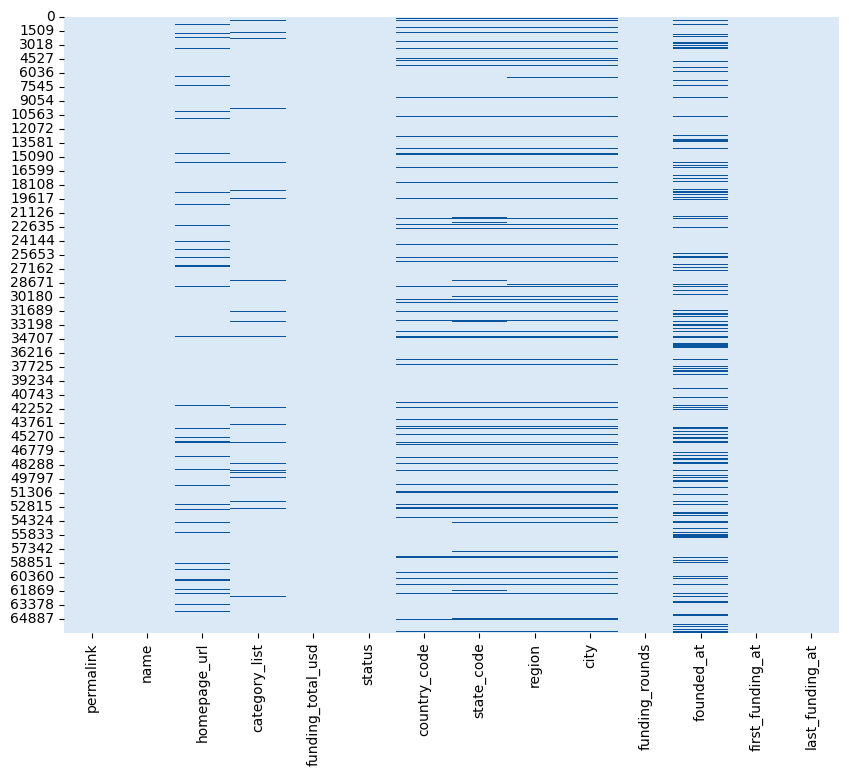

In [14]:
plt.figure(figsize=(10,8))
colormap = sns.color_palette("Blues")
sns.heatmap(df.isnull(), cbar=False,cmap=colormap)

We can't distinguish a clear interval of rows with missing values, nor a clear relation, the only thing that we can appreciate is that almost all the rows with a missing value in the country_code column, also have missing values in state, region, and city.

We have almost 5% of missing data in the category column, we can fill it with "Other".

For the columns related to location, we can see that when data is missing in one, data is almost always missing in the others, which makes sense because, if we don't have information about which country it is in, we probably don't know more specific data either. We are talking about having almost 90% of the data in the country code column, which is not bad. We could fill in the missing values using a Random Sample Imputation.

Finally, we have the column with the most missing data, having only about 70% of the data when it was founded. We could replace those values by first_funding_at or extract the years (which is what we are looking for), and apply a fill using Random Sample Imputation as well.

Text(0.5, 0, 'Current Status of startups')

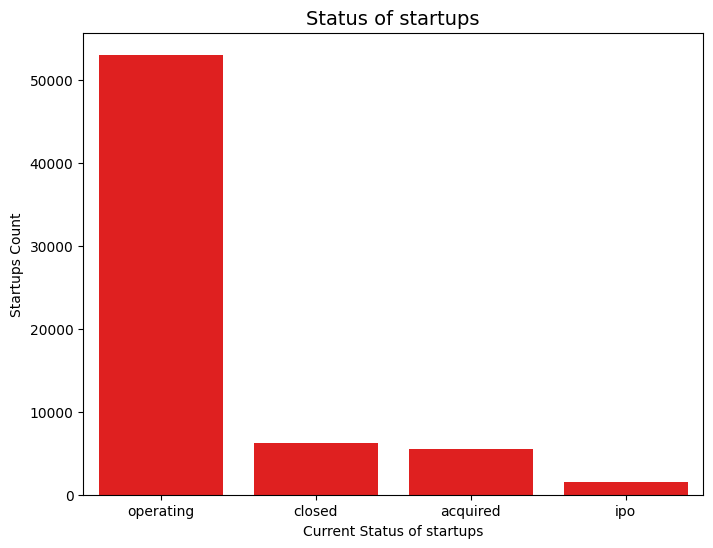

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['status'].value_counts().index,y=df['status'].value_counts(),color='red')
plt.title('Status of startups',size=14)
plt.ylabel('Startups Count',size=10)
plt.xlabel('Current Status of startups',size=10)

In [16]:
df['funding_rounds'].value_counts()

1     42472
2     12353
3      5606
4      2739
5      1468
6       774
7       418
8       214
9       126
10       79
11       51
12       28
13       15
15        6
14        6
16        6
17        3
18        3
19        1
Name: funding_rounds, dtype: int64

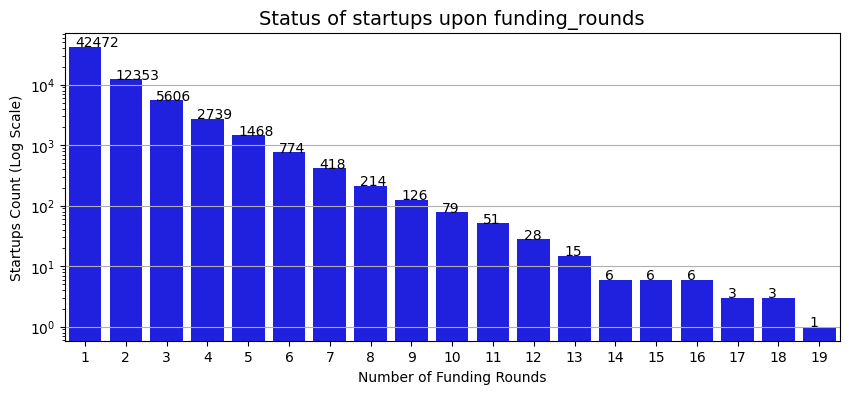

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['funding_rounds'].value_counts().index, y=df['funding_rounds'].value_counts(),color='blue')
plt.title('Status of startups upon funding_rounds',size=14)
plt.ylabel('Startups Count (Log Scale)',size=10)
plt.xlabel('Number of Funding Rounds', size=10)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(df['funding_rounds'].value_counts().index,df['funding_rounds'].value_counts())

In [18]:
df['category_list'].value_counts()

Software                                                                       3995
Biotechnology                                                                  3615
E-Commerce                                                                     1332
Mobile                                                                         1177
Clean Technology                                                               1133
                                                                               ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel       1
Apps|Mobile|Private Social Networking                                             1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media              1
Content|SaaS|Social Media Marketing|Software                                      1
Consumer Goods|E-Commerce|Internet                                                1
Name: category_list, Length: 27296, dtype: int64

We have more than 27_000 differentes category types.

We can see that at the end there are categories with only one startup, but this is mainly due to the fact that the company fits into multiple categories, having a combination of several of them.

We could assume that the first category that appears refers to its main category.
Choose the subcategory that is present among the most frequent categories, as to have a more general view of the startups.

# Data Wrangling

Transform funding_total_usd in float, and fill missing values

In [19]:
def str_to_float(row):
    if '-' in row:
        row = np.nan
    else:
        row = float(row)
    return row

df['funding_total_usd'] = df['funding_total_usd'].apply(str_to_float)
df['funding_total_usd'].dtypes

dtype('float64')

In [20]:
df['funding_total_usd'].isnull().sum()

12785

Here we see that we do in fact have missing values for the funding_total_usd column, only that they were previously filled with '-'.

Let's see the distribution of the fundind_total_usd column ignoring NaN values

In [21]:
df['funding_total_usd'].aggregate([np.nanmean,np.nanmedian,np.nanstd])

nanmean      1.847860e+07
nanmedian    2.000000e+06
nanstd       1.880133e+08
Name: funding_total_usd, dtype: float64

Let's see the estimated location and the estimated variability of the funding_total_usd grouping by
funding_rounds.

In [22]:
funding_rounds_group = df.groupby('funding_rounds')['funding_total_usd'].aggregate(['count',np.nanmean,np.nanmedian,np.nanstd])
funding_rounds_group.head()

,count,nanmean,nanmedian,nanstd
funding_rounds,,,,
1,30789,1.007059e+07,896000.0,1.382065e+08
2,11477,1.404059e+07,2870000.0,9.023609e+07
3,5447,2.289590e+07,7500000.0,8.833278e+07
4,2697,3.400935e+07,14650000.0,7.141552e+07
5,1456,7.170403e+07,25322724.5,7.926982e+08


Let's fill missing values in the column funding_total_usd with the mean calculated above. Depending on the number of funding rounds would be the mean assigned.

In [23]:
funding_filled = []

for h,i in enumerate(df['funding_total_usd']):
    if np.isnan(i):
        i = int(funding_rounds_group.loc[df['funding_rounds'].iloc[h],'nanmean'])
        funding_filled.append(i)
    else:
        funding_filled.append(int(i))

df['funding_filled'] = funding_filled
df['funding_filled'].isnull().sum()

0

One Hot Encoding and classify by status class
Let's create a column that classifies startups depending on whether they succeeded, failed or are still operating.
As well as apply One Hot Encoding to transform categorical variables in number values

In [24]:
status = []

for i in df['status']:
    if i in ['acquired','ipo']:
        status.append('success')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('operating')

df['status_class'] = status

In [25]:
status_class = pd.get_dummies(df['status_class'])
df = pd.concat([df,status_class],axis=1)
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,10000000,operating,0,1,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,700000,operating,0,1,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,3406878,operating,0,1,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2000000,operating,0,1,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,10070591,operating,0,1,0


We have a lot of missing values in country_code column as well as in founded_at column, so dropping those rows it's not an option, due to would be the big amount of data that we'll lose.

Filling country code column with Random Sample Imputation
We could fill in the missing values with the numpy random choice method (except for the null values), choosing according to their probability of being chosen.

The more startups are created in that country, the more likely it is that the missing value corresponds to that country.

In [26]:
# Let's see the status of startups depending on the country
country = []

for i in df.country_code:
  if not isinstance(i,str):
    country.append(np.random.choice(df.country_code[df.country_code.notnull()]))
  else:
    country.append(i)

df['country'] = country

In [27]:
# Original column
country_code_column = pd.DataFrame()
country_code_column['count'] = df.country_code.value_counts()
country_code_column['count/Total'] = df.country_code.value_counts()/df.country_code.count()
country_code_column['fail'] = df.groupby('country_code')['fail'].sum()/df.country_code.value_counts()
country_code_column['success'] = df.groupby('country_code')['success'].sum()/df.country_code.value_counts()
country_code_column = country_code_column[:10]

# Our column
country_column = pd.DataFrame()
country_column['count'] = df.country.value_counts()
country_column['count/Total'] = df.country.value_counts()/df.country.count()
country_column['fail'] = df.groupby('country')['fail'].sum()/df.country.value_counts()
country_column['success'] = df.groupby('country')['success'].sum()/df.country.value_counts()
country_column = country_column[:10]

# Let's see de difference between both columns
country_column - country_code_column

,count,count/Total,fail,success
USA,4469,0.000983,0.017102,-0.009788
GBR,429,-0.000044,0.014650,-0.000517
CAN,235,0.000144,0.017459,-0.009228
IND,173,-0.000210,0.016688,-0.001415
CHN,171,-0.000148,0.021977,-0.000365
FRA,133,0.000001,0.017616,-0.002797
DEU,138,0.000170,0.013262,-0.007594
ISR,108,-0.000076,0.017132,-0.004963
ESP,80,-0.000111,0.010630,0.000169
AUS,68,0.000137,0.017367,-0.003743


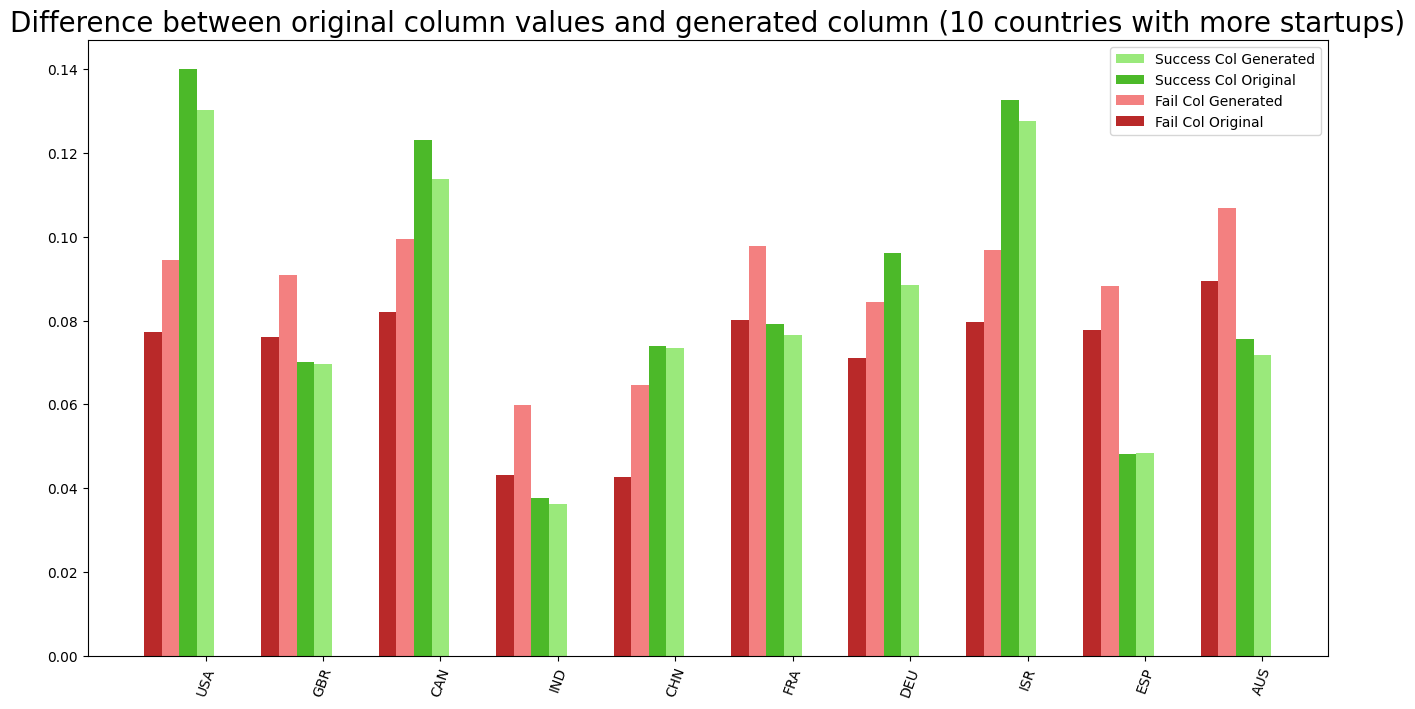

In [28]:
# Differences between both columns

n = len(country_column.index)
x = np.arange(n)
width = .15

plt.figure(figsize=(16,8))
plt.bar(x,country_column.success, width=width, label='Success Col Generated', color='#9AE97B' )
plt.bar(x - width,country_code_column.success, width=width, label='Success Col Original', color='#4CB929')
plt.bar(x - 2*width,country_column.fail, width=width, label='Fail Col Generated', color='#F38080')
plt.bar(x - 3*width,country_code_column.fail, width=width, label='Fail Col Original', color='#B92929')
plt.title('Difference between original column values and generated column (10 countries with more startups)', size=20)
plt.xticks(x,country_column.index,rotation=70)
plt.legend()
plt.show()

It seems reasonable, there's no a big difference of proportion regarding to the entire dataset.

<b>Random Sample Imputation with founded_at column.</b>
For missing values in the foundation date we will replace those values by the date of the first funding, and for those cases where we do not have either of the two values (24 inputs) we will fill them by doing a random sample imputation

In [29]:
years = []

for fou, first in zip(df.founded_at, df.first_funding_at):
  if isinstance(fou,str):
    years.append(int(fou.split('-')[0]))
  elif not isinstance(fou,str) and isinstance(first,str):
    years.append(int(first.split('-')[0]))
  else:
    date = int(np.random.choice(df.founded_at[df.founded_at.notnull()]).split('-')[0])
    years.append(date)

df['year'] = years
df[df.founded_at.isnull()].head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,founded_at,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success,country,year
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,NaN,2015-01-05,2015-01-05,10000000,operating,0,1,0,IND,2015
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,...,NaN,2014-01-30,2014-01-30,3406878,operating,0,1,0,USA,2014
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,...,NaN,2014-07-01,2014-07-01,41250,operating,0,1,0,HKG,2014
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,NaN,operating,USA,NC,NC - Other,Connellys Springs,...,NaN,2013-04-21,2013-04-21,10070591,operating,0,1,0,USA,2013
28,/organization/100du-tv,100du.tv,http://www.100du.com,Hospitality,3000000.0,operating,CHN,23,Shanghai,Shanghai,...,NaN,2008-01-07,2010-08-13,3000000,operating,0,1,0,CHN,2008


Simplify the category_list column
Let's create a column named main category, we're going to assume that the first description in
the category_list refers to the main category

In [30]:
main_category = []

for i in df['category_list']:
    if not isinstance(i,str):
      main_category.append('Other')
    else:
      main_category.append(i.split('|')[0])

df['main_category'] = main_category
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success,country,year,main_category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,2015-01-05,2015-01-05,10000000,operating,0,1,0,IND,2015,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,...,2014-03-01,2014-10-14,700000,operating,0,1,0,USA,2014,Application Platforms
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,...,2014-01-30,2014-01-30,3406878,operating,0,1,0,USA,2014,Apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,...,2008-03-19,2008-03-19,2000000,operating,0,1,0,CHN,2007,Curated Web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,...,2014-07-24,2014-07-24,10070591,operating,0,1,0,USA,2010,Software


### Drop the columns that we don't need for the analysis

In [31]:
df = df[['name','country','year','region','city','main_category','funding_rounds','funding_filled',
               'first_funding_at','last_funding_at','status','status_class','fail','operating','success']]
df.head()

,name,country,year,region,city,main_category,funding_rounds,funding_filled,first_funding_at,last_funding_at,status,status_class,fail,operating,success
0,#fame,IND,2015,Mumbai,Mumbai,Media,1,10000000,2015-01-05,2015-01-05,operating,operating,0,1,0
1,:Qounter,USA,2014,DE - Other,Delaware City,Application Platforms,2,700000,2014-03-01,2014-10-14,operating,operating,0,1,0
2,"(THE) ONE of THEM,Inc.",USA,2014,NaN,NaN,Apps,1,3406878,2014-01-30,2014-01-30,operating,operating,0,1,0
3,0-6.com,CHN,2007,Beijing,Beijing,Curated Web,1,2000000,2008-03-19,2008-03-19,operating,operating,0,1,0
4,004 Technologies,USA,2010,"Springfield, Illinois",Champaign,Software,1,10070591,2014-07-24,2014-07-24,operating,operating,0,1,0


# Exploratory Data Analysis

<Axes: >

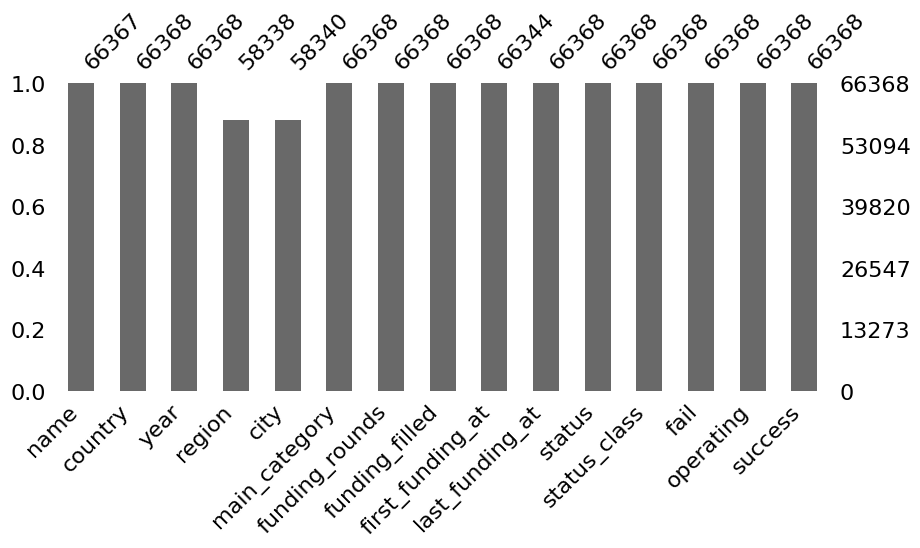

In [32]:
msno.bar(df,figsize=(10,4))

In [33]:
df.isnull().sum()/df.count()*100

name                 0.001507
country              0.000000
year                 0.000000
region              13.764613
city                13.760713
main_category        0.000000
funding_rounds       0.000000
funding_filled       0.000000
first_funding_at     0.036175
last_funding_at      0.000000
status               0.000000
status_class         0.000000
fail                 0.000000
operating            0.000000
success              0.000000
dtype: float64

In [34]:
df.count().max()

66368

### How many startups achieve the success?

In [35]:
success_ratio = df.success.mean()*100
print(f'{df.success[df.success == 1].count()} startups reach success, what means {success_ratio:.2f}% of total')

7096 startups reach success, what means 10.69% of total


### How many startups fail?

In [36]:
fail_ratio = df.fail.mean()*100
print(f'{df.fail[df.fail == 1].count()} startups fail, what means {fail_ratio:.2f}% of total')

6238 startups fail, what means 9.40% of total


<ipython-input-37-04017bd9bbe8>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


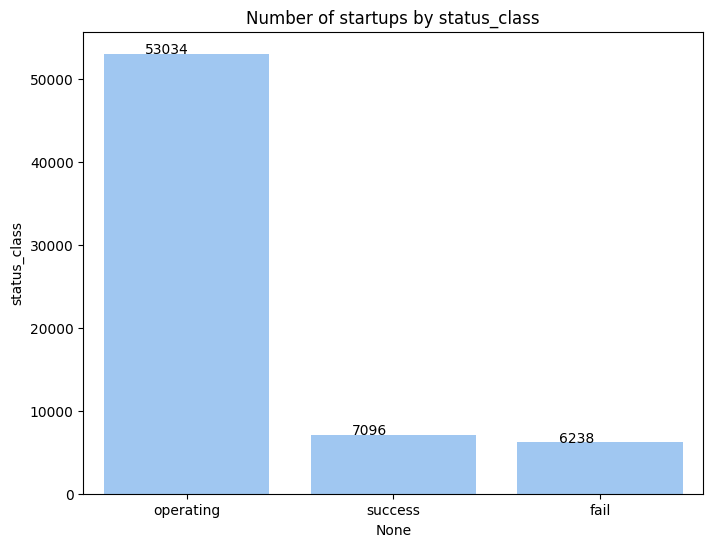

In [37]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class')
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-.20,y[i],y[i])

addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

<b>Filter the startups by foundation year</b><br>

> Indented block


Let's see only the startups founded after 1990, cause we want to see if there's a pattern between the most recent startups

In [38]:
df.count().max()

66368

In [39]:
df = df[(df.year > 1990) & (df.year < 2023)]
df.count().max()

64858

In [40]:
def group_by_status(column_name):
  # Group by a feature and calculate the fail/success rate
  group = df.groupby(column_name)[['success','fail','operating']].sum()
  group['total'] = group.sum(axis=1)
  group['success_ratio'] = group.success/group.total
  group['fail_ratio'] = group.fail/group.total
  return group

In [41]:
year_status = group_by_status('year')
year_status

,success,fail,operating,total,success_ratio,fail_ratio
year,,,,,,
1991,31,7,79,117,0.264957,0.059829
1992,52,10,90,152,0.342105,0.065789
1993,50,16,110,176,0.284091,0.090909
1994,57,11,127,195,0.292308,0.056410
1995,98,16,162,276,0.355072,0.057971
1996,119,27,262,408,0.291667,0.066176
1997,163,24,281,468,0.348291,0.051282
1998,202,42,347,591,0.341794,0.071066
1999,357,146,598,1101,0.324251,0.132607


In [42]:
year_status.sort_values(by='year', ascending=False).head()

,success,fail,operating,total,success_ratio,fail_ratio
year,,,,,,
2016,0,1,1,2,0.000000,0.500000
2015,48,621,2791,3460,0.013873,0.179480
2014,151,448,7156,7755,0.019471,0.057769
2013,172,358,7296,7826,0.021978,0.045745
2012,325,509,7097,7931,0.040978,0.064179


We can see a very clear outlier, and it corresponds to the year 2016, this is due to the small amount of the sample (only 2 entries), so the percentage is not representative.

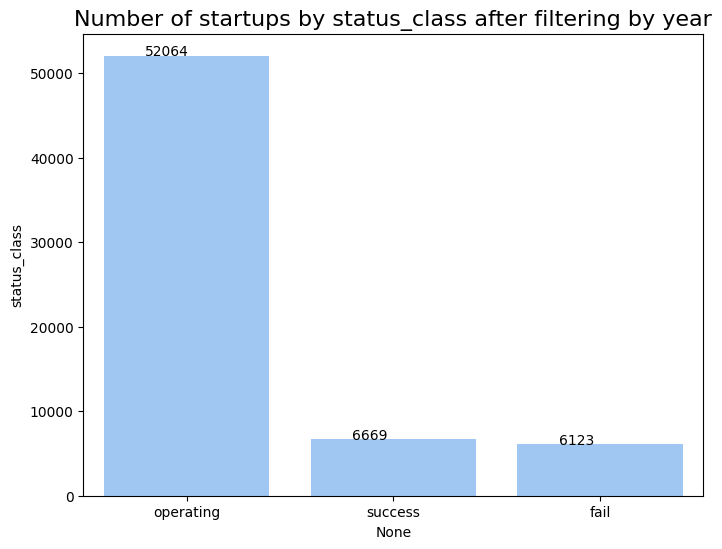

In [43]:
df = df[df.year < 2016]
year_status = year_status[year_status.index < 2016]
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class after filtering by year', size=16)
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

In [44]:
print(f'Number of startups: {df.count().max()}')
print(f'{df.success[df.success == 1].count()} startups reach success, what means {df.success.mean()*100:.2f}% of total')
print(f'{df.fail[df.fail == 1].count()} startups fail, what means {df.fail.mean()*100:.2f}% of total')

Number of startups: 64856
6669 startups reach success, what means 10.28% of total
6123 startups fail, what means 9.44% of total


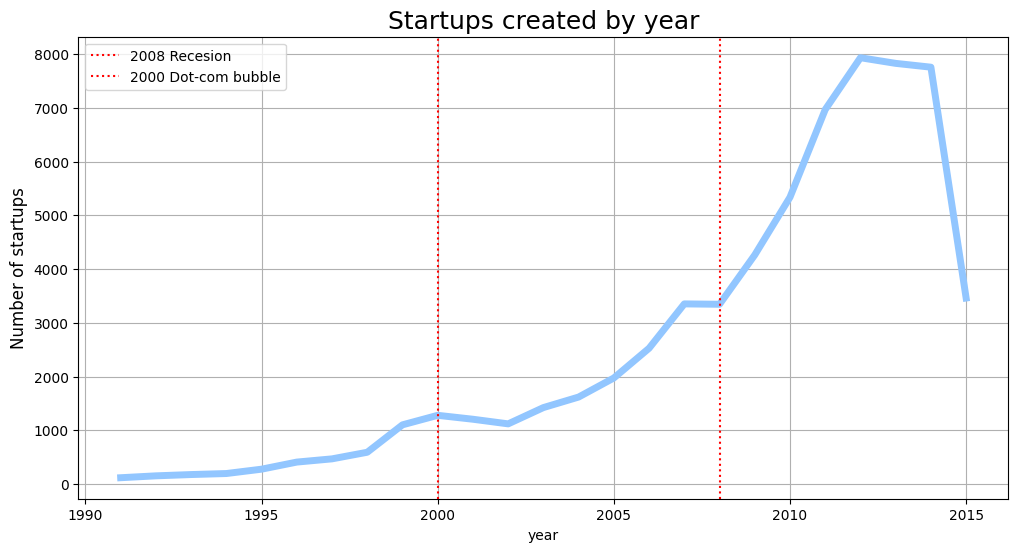

In [45]:
plt.figure(figsize=(12,6))
plt.title('Startups created by year', size=18)
plt.ylabel('Number of startups',size=12)
plt.grid()
sns.lineplot(data=year_status, x=year_status.index, y=year_status.total, linewidth=5)
plt.axvline(x=2008, color="red", label="2008 Recesion",linestyle=':')
plt.axvline(x=2000, color="red", label="2000 Dot-com bubble",linestyle=':')
plt.legend()

We can see in the trend line that there was a clear upward trend in terms of startup creation, with only two setbacks, located in 2000 and 2008, which makes sense, due to the crisis experienced during those years.

However, we can observe a slight drop in 2014 and a huge drop in 2015. This could be explained by the nature of the dataset and the possible lack of entries in the most recent years, as happened in a more extreme way with 2016.

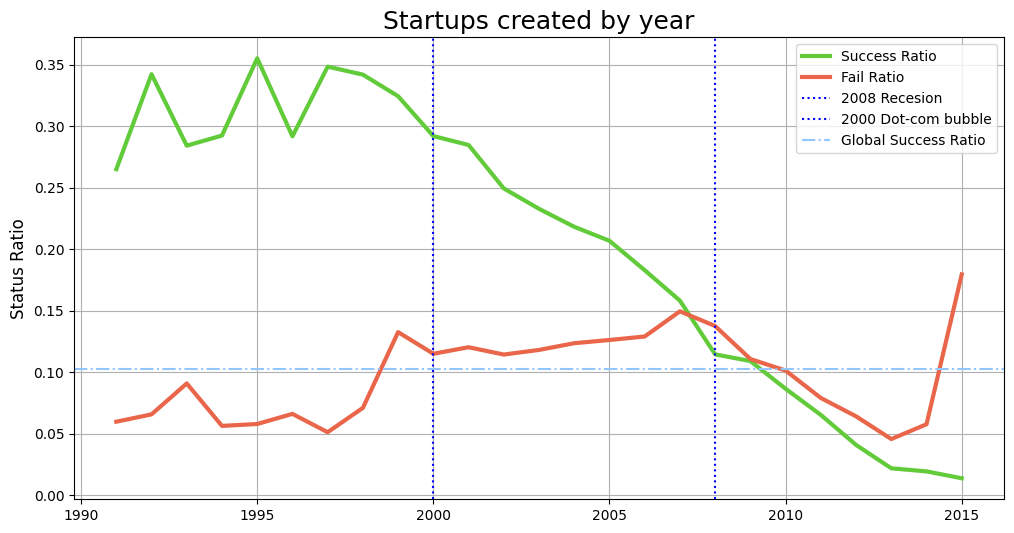

In [46]:
plt.figure(figsize=(12,6))
plt.title('Startups created by year', size=18)
plt.ylabel('Status Ratio',size=12)
plt.plot(year_status[year_status.index < 2016].index,year_status[year_status.index < 2016].success_ratio,
         label='Success Ratio',color='#62CB3A',linewidth=3)
plt.plot(year_status[year_status.index < 2016].index,year_status[year_status.index < 2016].fail_ratio,
         label='Fail Ratio',color='#EA664A',linewidth=3)
plt.axvline(x=2008, color="blue", label="2008 Recesion",linestyle=':')
plt.axvline(x=2000, color="blue", label="2000 Dot-com bubble",linestyle=':')
plt.axhline(df.success.mean(), label='Global Success Ratio', linestyle='-.')
plt.grid()
plt.legend()

We can see a disturbing trend graph of both the percentage of startups that have succeeded and those that have failed over the years, we can see how in both crises, the trend went through an inflection point, in fact, it is just during the 2008 crisis that both trends intersect.

The most distressing thing of all is The clear downward trend in the success rate of startups since its peak in 1997.

<Axes: title={'center': 'Years distribution by status'}>

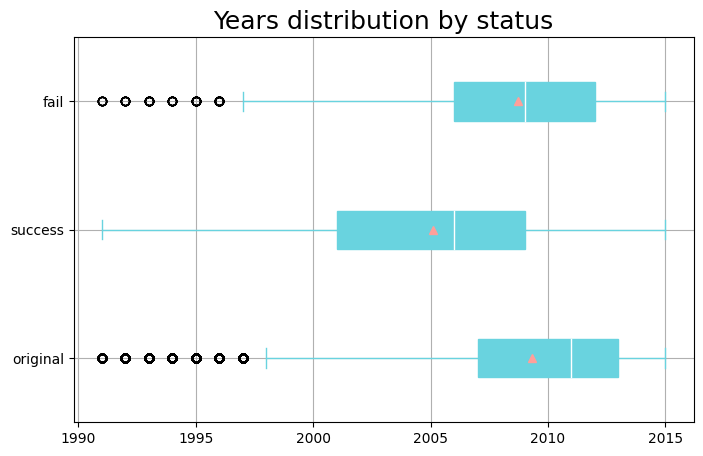

In [47]:
df_year = pd.DataFrame()
df_year['original'] = df.year
df_year['success'] = df.year[df.success == 1]
df_year['fail'] = df.year[df.fail == 1]

plt.figure(figsize=(8,5))
plt.title('Years distribution by status',size=18)
df_year.boxplot(color='#69D3DF', patch_artist=True, vert=0,showmeans=True, medianprops={'color':'white'})

We can see that both the mean and the median, as well as the large part of the data is in a range of years further away in the successful startups is less than those that have failed, this makes sense, following the same line of our analysis previously performed, in which we observe that the percentage of startups that achieve success is increasingly lower.

Although the graph of the number of stratups per year showed a large drop, we concluded that this could be due to a failure in the data collection and not to a real drop. Assuming that argument to be true, then we would see an upward trend in the number of startups per year, which would make sense, because it has democratized the use of tools that previously would have been accessible only to the wealthiest people. This means that the number of startups is on the rise, which in turn means that there is more and more competition and fewer startups are the ones that finally reach success in comparison of the total.

<b>Let's visualize how is the behavior of startups depending on the country.</b><br>
We'll going to ignore countries with less than 50 startups, because could distort the final result.

In [48]:
country_status = group_by_status('region')

# Filter by countries with at least 50 startups
countries_most = country_status.total[country_status.total >= 400]
print(f'There are {countries_most.count()} countries with at least 500 startups')

There are 23 countries with at least 500 startups


In [49]:
country_status.head()

,success,fail,operating,total,success_ratio,fail_ratio
region,,,,,,
A Coruna,0,0,4,4,0.0,0.000000
AB - Other,0,0,9,9,0.0,0.000000
AK - Other,0,0,6,6,0.0,0.000000
AL - Other,0,2,17,19,0.0,0.105263
AR - Other,0,0,22,22,0.0,0.000000


<ipython-input-50-2d4f38224a48>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world = top_ten.append(rest_world)


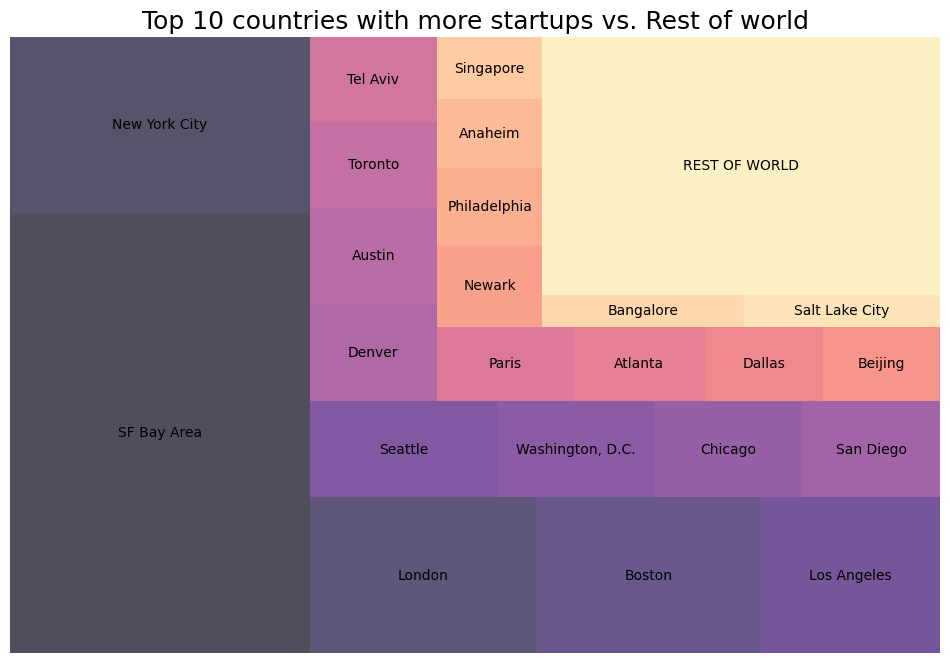

In [50]:
countries_analysis = country_status[country_status.total >= 400]
top_ten = countries_analysis.total.sort_values(ascending=False).head(30)
rest_world = pd.Series(countries_analysis.total.sort_values(ascending=False)[11:].sum(axis=0), index=['REST OF WORLD'])
world = top_ten.append(rest_world)

plt.figure(figsize=(12,8))
plt.title('Top 10 countries with more startups vs. Rest of world', size=18)
squarify.plot(sizes=world, label=world.index, color=sns.color_palette("magma",len(world)), alpha = 0.7)
plt.axis('off')
plt.show()

In [51]:
world.head(10)

SF Bay Area         8710
New York City       3481
London              2323
Boston              2301
Los Angeles         1844
Seattle             1190
Washington, D.C.     995
Chicago              942
San Diego            873
Denver               816
dtype: int64

In [52]:
top_ten.head(25)

region
SF Bay Area         8710
New York City       3481
London              2323
Boston              2301
Los Angeles         1844
Seattle             1190
Washington, D.C.     995
Chicago              942
San Diego            873
Denver               816
Austin               807
Toronto              719
Tel Aviv             712
Paris                673
Atlanta              642
Dallas               581
Beijing              573
Newark               572
Philadelphia         533
Anaheim              479
Singapore            435
Bangalore            429
Salt Lake City       417
Name: total, dtype: int64

In [53]:
countries_analysis.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Anaheim to Washington, D.C.
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   success        23 non-null     uint64 
 1   fail           23 non-null     uint64 
 2   operating      23 non-null     uint64 
 3   total          23 non-null     int64  
 4   success_ratio  23 non-null     float64
 5   fail_ratio     23 non-null     float64
dtypes: float64(2), int64(1), uint64(3)
memory usage: 1.3+ KB


In [54]:
df_sorted = countries_analysis.sort_values(by='total', ascending=False)
df_top25 = df_sorted.head(25)
df_top25

,success,fail,operating,total,success_ratio,fail_ratio
region,,,,,,
SF Bay Area,1650,793,6267,8710,0.189437,0.091045
New York City,414,272,2795,3481,0.118931,0.078138
London,181,159,1983,2323,0.077916,0.068446
Boston,452,163,1686,2301,0.196436,0.070839
Los Angeles,202,177,1465,1844,0.109544,0.095987
Seattle,195,106,889,1190,0.163866,0.089076
"Washington, D.C.",144,61,790,995,0.144724,0.061307
Chicago,120,54,768,942,0.127389,0.057325
San Diego,144,69,660,873,0.164948,0.079038


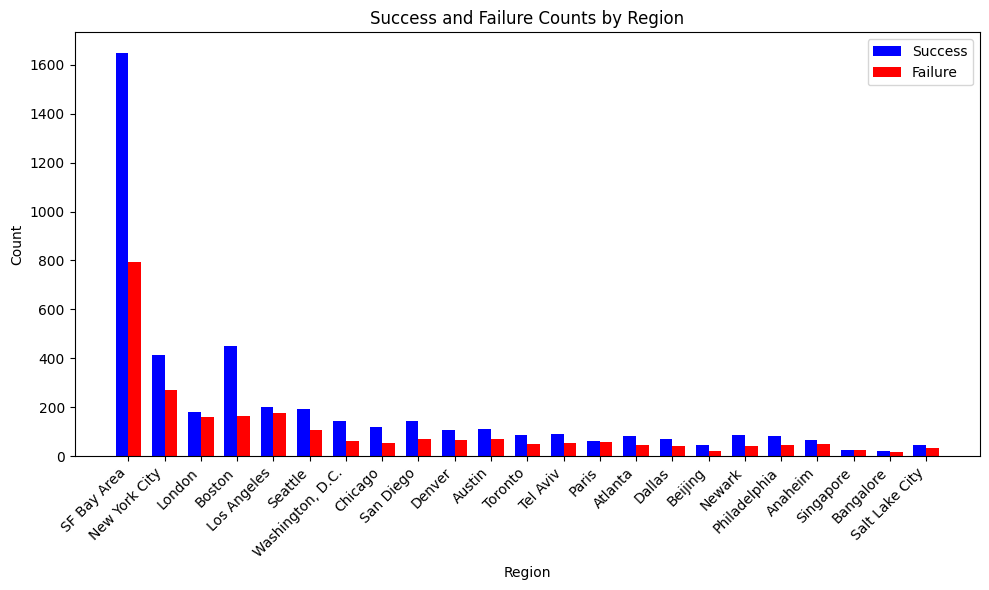

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(df_top25.index))

bar1 = ax.bar(index, df_top25['success'], bar_width, label='Success', color='b')
bar2 = ax.bar([i + bar_width for i in index], df_top25['fail'], bar_width, label='Failure', color='r')

ax.set_xlabel('Region')
ax.set_ylabel('Count')
ax.set_title('Success and Failure Counts by Region')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df_top25.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

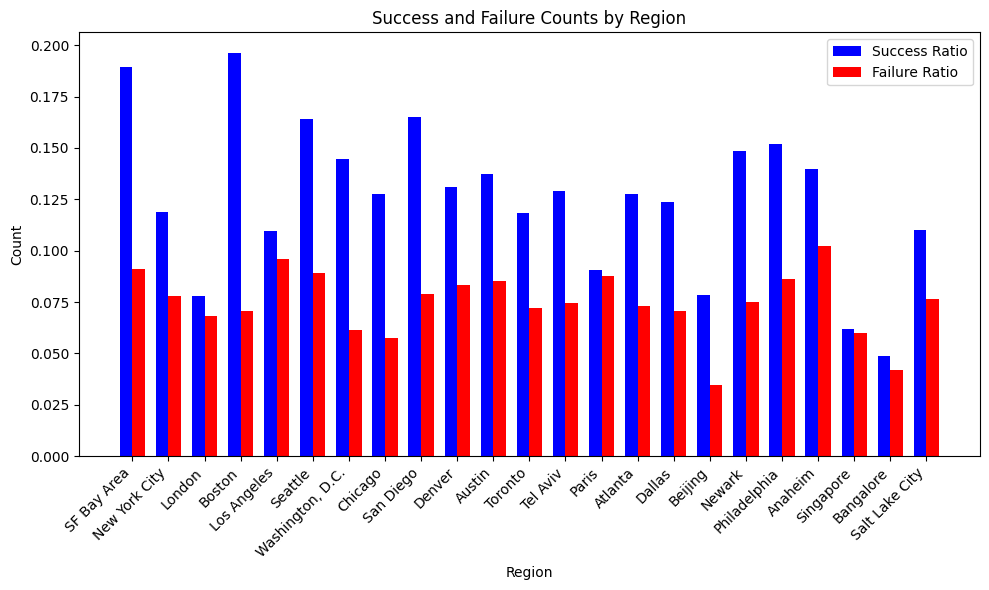

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(df_top25.index))

bar1 = ax.bar(index, df_top25['success_ratio'], bar_width, label='Success Ratio', color='b')
bar2 = ax.bar([i + bar_width for i in index], df_top25['fail_ratio'], bar_width, label='Failure Ratio', color='r')

ax.set_xlabel('Region')
ax.set_ylabel('Count')
ax.set_title('Success and Failure Counts by Region')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df_top25.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

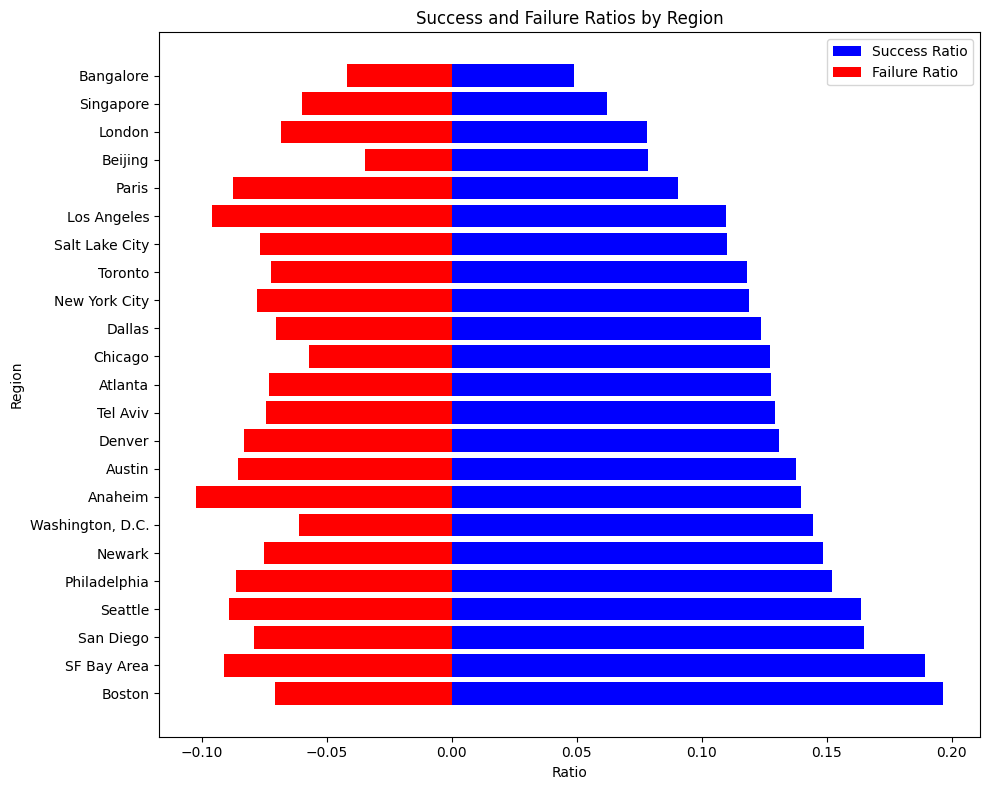

In [57]:
df_sorted = countries_analysis.sort_values(by='success_ratio', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

index = range(len(df_sorted))

ax.barh(index, df_sorted['success_ratio'], color='b', label='Success Ratio')
ax.barh(index, -df_sorted['fail_ratio'], color='r', label='Failure Ratio')

ax.set_xlabel('Ratio')
ax.set_ylabel('Region')
ax.set_title('Success and Failure Ratios by Region')
ax.set_yticks(index)
ax.set_yticklabels(df_sorted.index)
ax.legend()

plt.tight_layout()
plt.show()

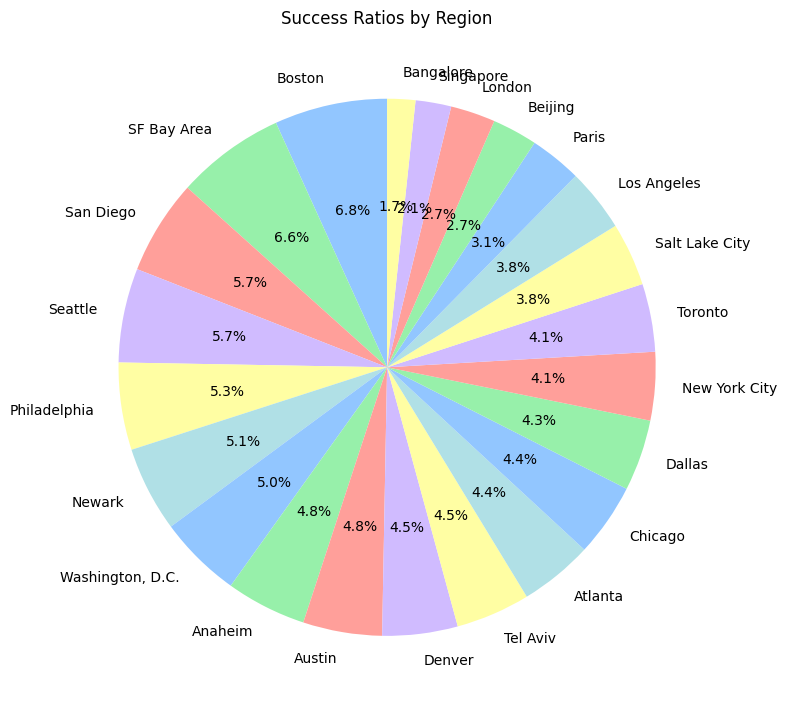

In [58]:
df_sorted = countries_analysis.sort_values(by='success_ratio', ascending=False)
df_top25 = df_sorted.head(25)
df_top25
# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Extracting data
success_ratios = df_top25['success_ratio']
regions = df_top25.index

# Plotting pie chart for each region
ax.pie(success_ratios, labels=regions, autopct='%1.1f%%', startangle=90)

ax.set_title('Success Ratios by Region')

plt.tight_layout()
plt.show()

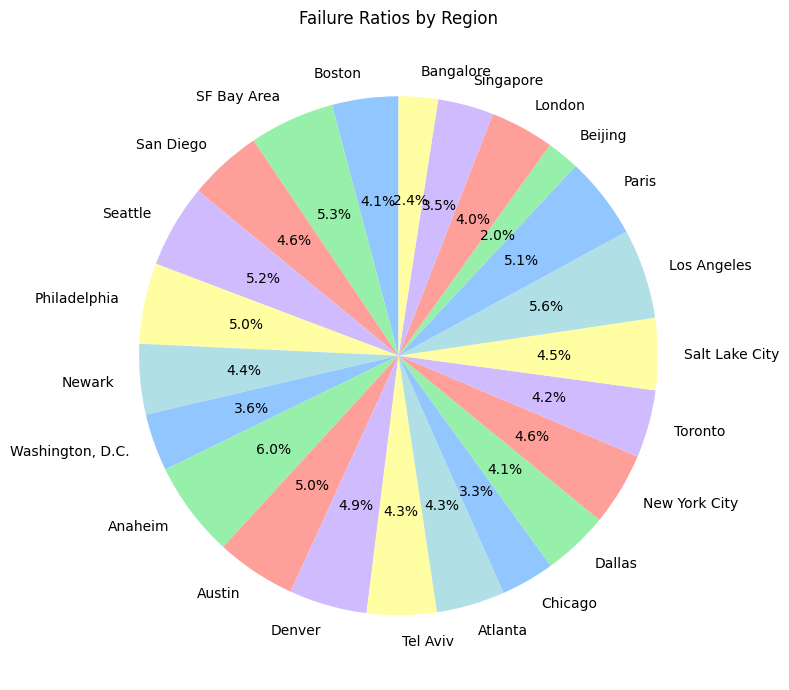

In [59]:
# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Extracting data
success_ratios = df_top25['fail_ratio']
regions = df_top25.index

# Plotting pie chart for each region
ax.pie(success_ratios, labels=regions, autopct='%1.1f%%', startangle=90)

ax.set_title('Failure Ratios by Region')

plt.tight_layout()
plt.show()

In [60]:
# Calculate the difference between success and failure ratios
countries_analysis['success_failure_diff'] = countries_analysis['success_ratio'] - countries_analysis['fail_ratio']
countries_analysis

<ipython-input-60-b4a298842cae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_analysis['success_failure_diff'] = countries_analysis['success_ratio'] - countries_analysis['fail_ratio']


,success,fail,operating,total,success_ratio,fail_ratio,success_failure_diff
region,,,,,,,
Anaheim,67,49,363,479,0.139875,0.102296,0.037578
Atlanta,82,47,513,642,0.127726,0.073209,0.054517
Austin,111,69,627,807,0.137546,0.085502,0.052045
Bangalore,21,18,390,429,0.048951,0.041958,0.006993
Beijing,45,20,508,573,0.078534,0.034904,0.043630
Boston,452,163,1686,2301,0.196436,0.070839,0.125598
Chicago,120,54,768,942,0.127389,0.057325,0.070064
Dallas,72,41,468,581,0.123924,0.070568,0.053356
Denver,107,68,641,816,0.131127,0.083333,0.047794


In [61]:
# Sort the DataFrame by the difference in descending order
df_sorted = countries_analysis.sort_values(by='success_failure_diff', ascending=False)

# Select the top 25 regions
top_25_regions = df_sorted.head(25)

print("Top 25 regions with a better success ratio compared to the failure ratio:")
print(top_25_regions[['success_failure_diff']])

Top 25 regions with a better success ratio compared to the failure ratio:
                  success_failure_diff
region                                
Boston                        0.125598
SF Bay Area                   0.098393
San Diego                     0.085911
Washington, D.C.              0.083417
Seattle                       0.074790
Newark                        0.073427
Chicago                       0.070064
Philadelphia                  0.065666
Tel Aviv                      0.054775
Atlanta                       0.054517
Dallas                        0.053356
Austin                        0.052045
Denver                        0.047794
Toronto                       0.045897
Beijing                       0.043630
New York City                 0.040793
Anaheim                       0.037578
Salt Lake City                0.033573
Los Angeles                   0.013557
London                        0.009471
Bangalore                     0.006993
Paris                        

In [62]:
region_data = df.groupby('region').agg({
    'funding_filled': 'sum',
    'name': 'count'  # Counting unique startups
}).reset_index()
region_data

,region,funding_filled,name
0,A Coruna,5294191,4
1,AB - Other,72703955,9
2,AK - Other,39661773,6
3,AL - Other,95464728,19
4,AR - Other,165899494,22
...,...,...,...
1076,Zhengzhou,20422289,4
1077,Zhuhai,894519719,5
1078,Zurich,1259833604,111
1079,Ã‡an,362107967,33


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64856 entries, 0 to 66367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              64855 non-null  object
 1   country           64856 non-null  object
 2   year              64856 non-null  int64 
 3   region            56927 non-null  object
 4   city              56929 non-null  object
 5   main_category     64856 non-null  object
 6   funding_rounds    64856 non-null  int64 
 7   funding_filled    64856 non-null  int64 
 8   first_funding_at  64833 non-null  object
 9   last_funding_at   64856 non-null  object
 10  status            64856 non-null  object
 11  status_class      64856 non-null  object
 12  fail              64856 non-null  uint8 
 13  operating         64856 non-null  uint8 
 14  success           64856 non-null  uint8 
dtypes: int64(3), object(9), uint8(3)
memory usage: 6.6+ MB


In [64]:
# Group the data by the 'region' column
grouped_by_region = df.groupby('region')

# Now you have a GroupBy object that contains groups of data for each unique region

# You can iterate over the groups and perform operations on each group if needed
for region, group_data in grouped_by_region:
    print(f"Region: {region}")
    print(group_data.head())  # Example: print the first few rows of each group

Streaming output truncated to the last 5000 lines.
15465                Saint Laurent   Semiconductors               2   
18739                 Montréal-est        Education               5   

       funding_filled first_funding_at last_funding_at     status  \
9194         10070591       2012-10-04      2012-10-04  operating   
11870           40000       2013-08-23      2013-08-23  operating   
12048         5000000       2011-08-18      2011-08-18     closed   
15465         6900000       2003-10-01      2006-02-09     closed   
18739          859704       2015-03-01      2015-11-09  operating   

      status_class  fail  operating  success  
9194     operating     0          1        0  
11870    operating     0          1        0  
12048         fail     1          0        0  
15465         fail     1          0        0  
18739    operating     0          1        0  
Region: Quarry Bay
               name country  year      region        city main_category  \
55564  Surround

In [66]:
# Calculate total funding amount for each region
total_funding_by_region = grouped_by_region['funding_filled'].sum()

# Calculate number of startups for each region
num_startups_by_region = grouped_by_region['name'].nunique()

# Calculate average funding per startup for each region
avg_funding_per_startup = total_funding_by_region / num_startups_by_region

# Calculate success rate for each region
success_rate_by_region = (grouped_by_region['success'].sum() / grouped_by_region['success'].count()) * 100

# Create a DataFrame to store the calculated metrics
region_metrics = pd.DataFrame({
    'total_funding_usd': total_funding_by_region,
    'num_startups': num_startups_by_region,
    'avg_funding_per_startup': avg_funding_per_startup,
    'success_rate': success_rate_by_region
})

# Print the calculated metrics for each region
print(region_metrics)

            total_funding_usd  num_startups  avg_funding_per_startup  \
region                                                                 
A Coruna              5294191             4             1.323548e+06   
AB - Other           72703955             9             8.078217e+06   
AK - Other           39661773             6             6.610296e+06   
AL - Other           95464728            19             5.024459e+06   
AR - Other          165899494            22             7.540886e+06   
...                       ...           ...                      ...   
Zhengzhou            20422289             4             5.105572e+06   
Zhuhai              894519719             5             1.789039e+08   
Zurich             1259833604           111             1.134985e+07   
Ã‡an                362107967            33             1.097297e+07   
Ã‰vry                59884397             5             1.197688e+07   

            success_rate  
region                    
A Coruna 

In [70]:
# Sort the region_metrics DataFrame by a certain metric (e.g., total funding amount)
sorted_region_metrics = region_metrics.sort_values(by='total_funding_usd', ascending=False)

# Select the top 15 regions
top_15_regions = sorted_region_metrics.head(15)
top_15_regions

,total_funding_usd,num_startups,avg_funding_per_startup,success_rate
region,,,,
SF Bay Area,206425830805,8691,2.375168e+07,18.943743
Boston,55303950741,2298,2.406612e+07,19.643633
New York City,51248949229,3476,1.474366e+07,11.893134
Los Angeles,29402340399,1842,1.596218e+07,10.954447
Beijing,26677307931,573,4.655726e+07,7.853403
London,25381087339,2321,1.093541e+07,7.791649
Seattle,24685190922,1190,2.074386e+07,16.386555
"Washington, D.C.",17976710529,995,1.806705e+07,14.472362
Chicago,17956748451,942,1.906237e+07,12.738854


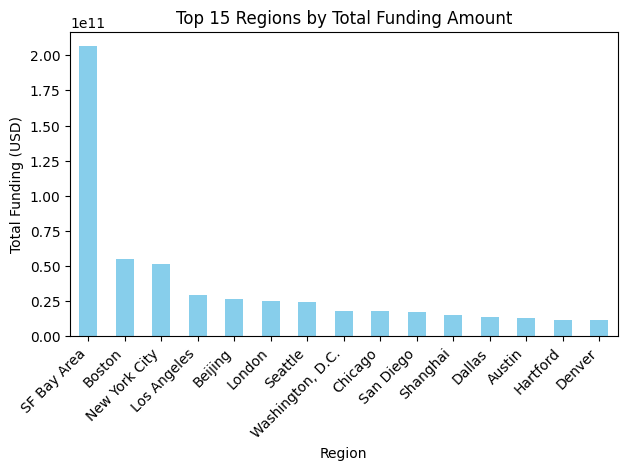

In [71]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot total funding amount by region
plt.subplot(2, 2, 1)
top_15_regions['total_funding_usd'].plot(kind='bar', color='skyblue')
plt.title('Top 15 Regions by Total Funding Amount')
plt.xlabel('Region')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

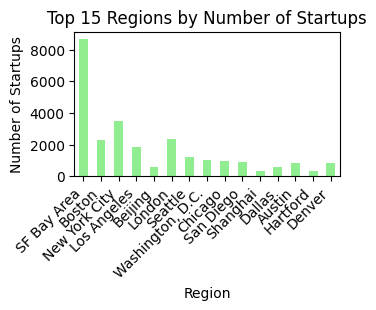

In [72]:
# Plot number of startups by region
plt.subplot(2, 2, 2)
top_15_regions['num_startups'].plot(kind='bar', color='lightgreen')
plt.title('Top 15 Regions by Number of Startups')
plt.xlabel('Region')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

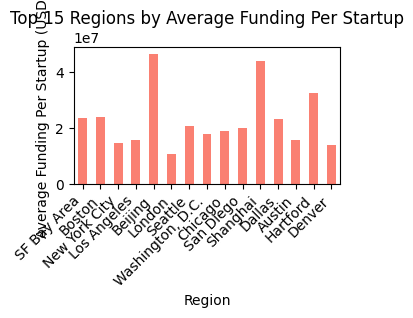

In [73]:
# Plot average funding per startup by region
plt.subplot(2, 2, 3)
top_15_regions['avg_funding_per_startup'].plot(kind='bar', color='salmon')
plt.title('Top 15 Regions by Average Funding Per Startup')
plt.xlabel('Region')
plt.ylabel('Average Funding Per Startup (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

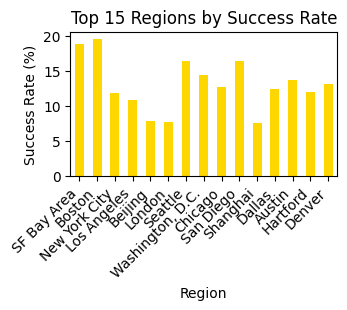

In [74]:
# Plot success rate by region
plt.subplot(2, 2, 4)
top_15_regions['success_rate'].plot(kind='bar', color='gold')
plt.title('Top 15 Regions by Success Rate')
plt.xlabel('Region')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [75]:
# Assuming 'region_metrics' is your DataFrame containing the calculated metrics for each region

# Sort the region_metrics DataFrame by a certain metric (e.g., total funding amount)
sorted_region_metrics = region_metrics.sort_values(by='total_funding_usd', ascending=False)

# Print summary statistics for the top regions
print("Summary Statistics for Top Regions:")
print(sorted_region_metrics.head(15))  # Display statistics for the top 10 regions

# Calculate mean, median, and standard deviation for each metric across all regions
mean_metrics = region_metrics.mean()
median_metrics = region_metrics.median()
std_metrics = region_metrics.std()

# Print summary statistics across all regions
print("\nSummary Statistics Across All Regions:")
print("Mean:")
print(mean_metrics)
print("\nMedian:")
print(median_metrics)
print("\nStandard Deviation:")
print(std_metrics)

Summary Statistics for Top Regions:
                  total_funding_usd  num_startups  avg_funding_per_startup  \
region                                                                       
SF Bay Area            206425830805          8691             2.375168e+07   
Boston                  55303950741          2298             2.406612e+07   
New York City           51248949229          3476             1.474366e+07   
Los Angeles             29402340399          1842             1.596218e+07   
Beijing                 26677307931           573             4.655726e+07   
London                  25381087339          2321             1.093541e+07   
Seattle                 24685190922          1190             2.074386e+07   
Washington, D.C.        17976710529           995             1.806705e+07   
Chicago                 17956748451           942             1.906237e+07   
San Diego               17469247956           873             2.001059e+07   
Shanghai                1516

In [86]:
import matplotlib.pyplot as plt

# Assuming 'region_metrics' is your DataFrame containing the calculated metrics for each region

# Sort the region_metrics DataFrame by a certain metric (e.g., total funding amount)
sorted_region_metrics = region_metrics.sort_values(by='total_funding_usd', ascending=False)

# Select top N regions to visualize (e.g., top 15 regions)
top_N_regions = sorted_region_metrics.head(15)
top_N_regions

,total_funding_usd,num_startups,avg_funding_per_startup,success_rate
region,,,,
SF Bay Area,206425830805,8691,2.375168e+07,18.943743
Boston,55303950741,2298,2.406612e+07,19.643633
New York City,51248949229,3476,1.474366e+07,11.893134
Los Angeles,29402340399,1842,1.596218e+07,10.954447
Beijing,26677307931,573,4.655726e+07,7.853403
London,25381087339,2321,1.093541e+07,7.791649
Seattle,24685190922,1190,2.074386e+07,16.386555
"Washington, D.C.",17976710529,995,1.806705e+07,14.472362
Chicago,17956748451,942,1.906237e+07,12.738854


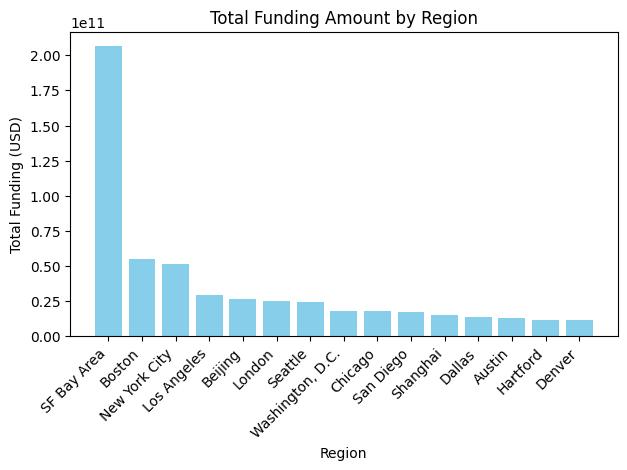

In [77]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot total funding amount by region
plt.subplot(2, 2, 1)
plt.bar(top_N_regions.index, top_N_regions['total_funding_usd'], color='skyblue')
plt.title('Total Funding Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

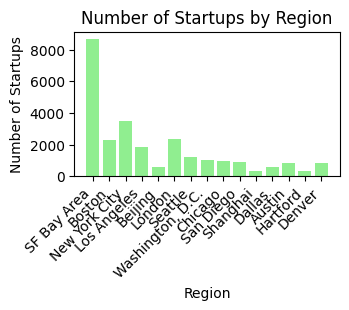

In [78]:
# Plot number of startups by region
plt.subplot(2, 2, 2)
plt.bar(top_N_regions.index, top_N_regions['num_startups'], color='lightgreen')
plt.title('Number of Startups by Region')
plt.xlabel('Region')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

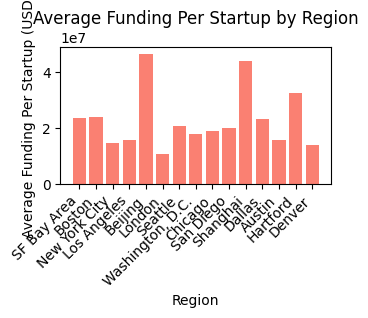

In [79]:
# Plot average funding per startup by region
plt.subplot(2, 2, 3)
plt.bar(top_N_regions.index, top_N_regions['avg_funding_per_startup'], color='salmon')
plt.title('Average Funding Per Startup by Region')
plt.xlabel('Region')
plt.ylabel('Average Funding Per Startup (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

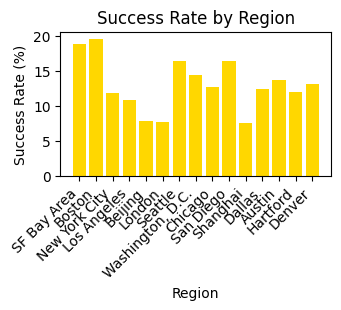

In [80]:
# Plot success rate by region
plt.subplot(2, 2, 4)
plt.bar(top_N_regions.index, top_N_regions['success_rate'], color='gold')
plt.title('Success Rate by Region')
plt.xlabel('Region')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Correlation Matrix:
                         total_funding_usd  num_startups  \
total_funding_usd                 1.000000      0.973934   
num_startups                      0.973934      1.000000   
avg_funding_per_startup           0.074945      0.043660   
success_rate                      0.068003      0.071989   

                         avg_funding_per_startup  success_rate  
total_funding_usd                       0.074945      0.068003  
num_startups                            0.043660      0.071989  
avg_funding_per_startup                 1.000000      0.167027  
success_rate                            0.167027      1.000000  


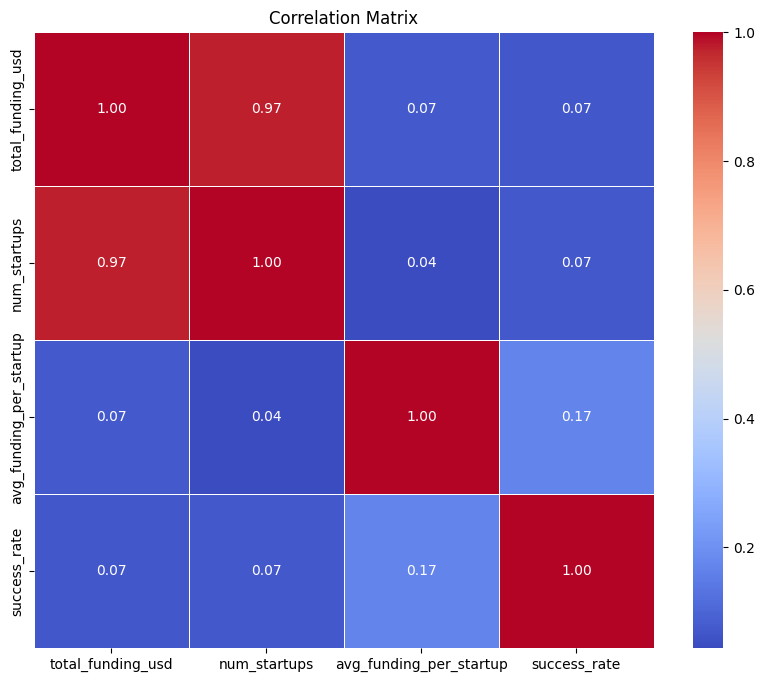

In [81]:
# Assuming 'region_metrics' is your DataFrame containing calculated metrics for each region

# Compute correlation matrix
correlation_matrix = region_metrics.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

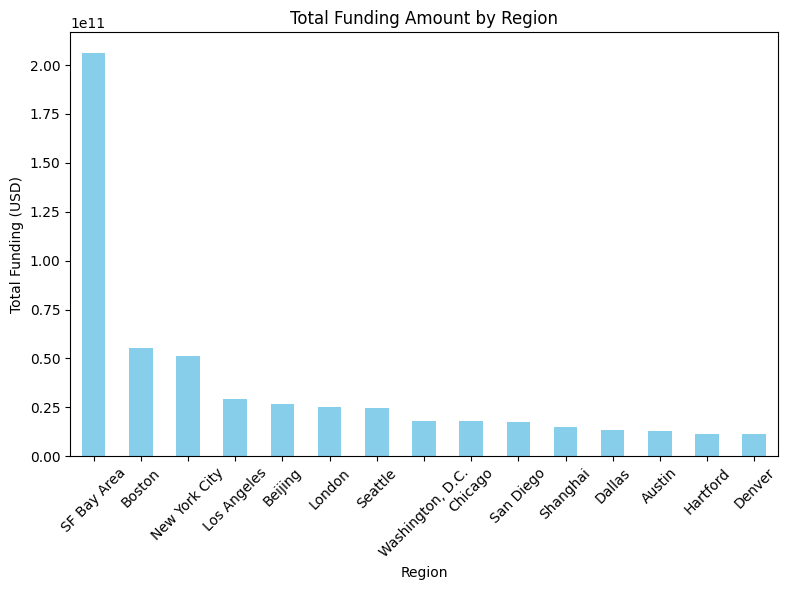

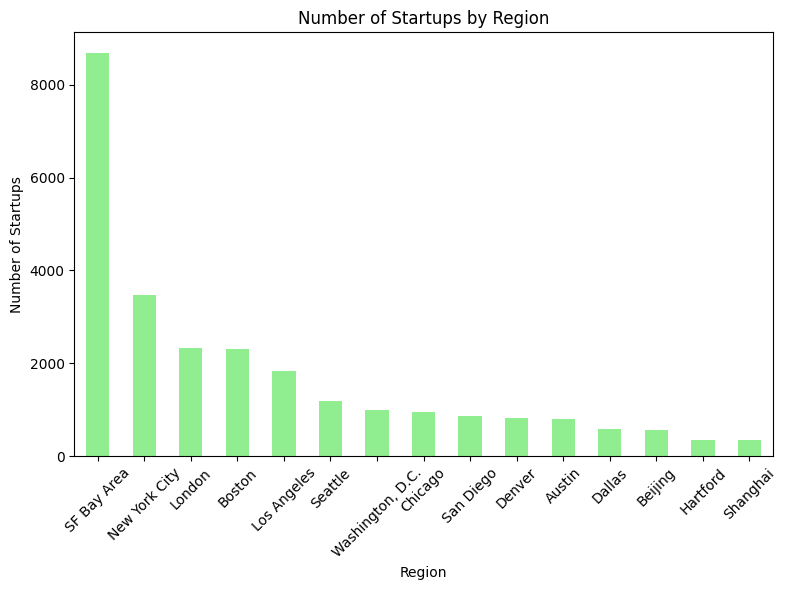

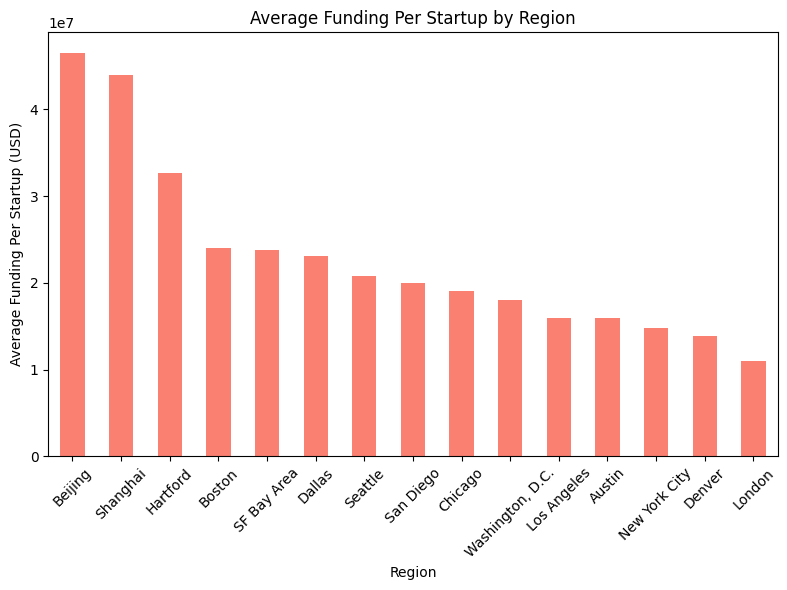

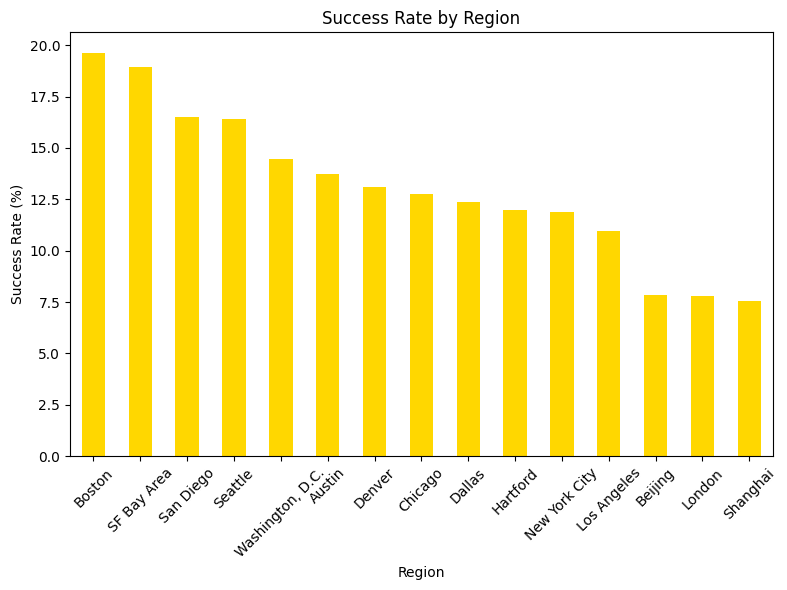

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'region_metrics' is your DataFrame containing the calculated metrics for each region

# 1. Total Funding Amount by Region
total_funding_by_region = top_N_regions['total_funding_usd']

# Plot Total Funding Amount by Region
plt.figure(figsize=(8, 6))
total_funding_by_region.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Funding Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Number of Startups by Region
num_startups_by_region = top_N_regions['num_startups']

# Plot Number of Startups by Region
plt.figure(figsize=(8, 6))
num_startups_by_region.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Number of Startups by Region')
plt.xlabel('Region')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Average Funding Per Startup by Region
avg_funding_per_startup = top_N_regions['avg_funding_per_startup']

# Plot Average Funding Per Startup by Region
plt.figure(figsize=(8, 6))
avg_funding_per_startup.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Average Funding Per Startup by Region')
plt.xlabel('Region')
plt.ylabel('Average Funding Per Startup (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Success Rate by Region
success_rate_by_region = top_N_regions['success_rate']

# Plot Success Rate by Region
plt.figure(figsize=(8, 6))
success_rate_by_region.sort_values(ascending=False).plot(kind='bar', color='gold')
plt.title('Success Rate by Region')
plt.xlabel('Region')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()